In [49]:
import pandas as pd
import numpy as np
import altair as alt

print("Libraries imported.")

Libraries imported.


In [32]:
df = pd.read_csv('Titanic Dataset.csv')  
print("Dataset awal:")
print(df.head())
print("\nInfo dataset:")
print(df.info())

Dataset awal:
   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

     age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.00      0      0   24160  211.3375       B5        S    2    NaN   
1   0.92      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.00      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     S

In [33]:
print("\nJumlah missing values per kolom:")
print(df.isnull().sum())


Jumlah missing values per kolom:
pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


In [46]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())



In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
print("\nDataset setelah isi missing values:")
print(df.head())


Dataset setelah isi missing values:
   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

     age  sibsp  parch  ticket      fare    cabin embarked boat        body  \
0  29.00      0      0   24160  211.3375       B5        S    2  160.809917   
1   0.92      1      2  113781  151.5500  C22 C26        S   11  160.809917   
2   2.00      1      2  113781  151.5500  C22 C26        S   13  160.809917   
3  30.00      1      2  113781  151.5500  C22 C26        S   13  135.000000   
4  25.00      1      2  113781  151.5500  C22 C26        S   13  160.809917   

       

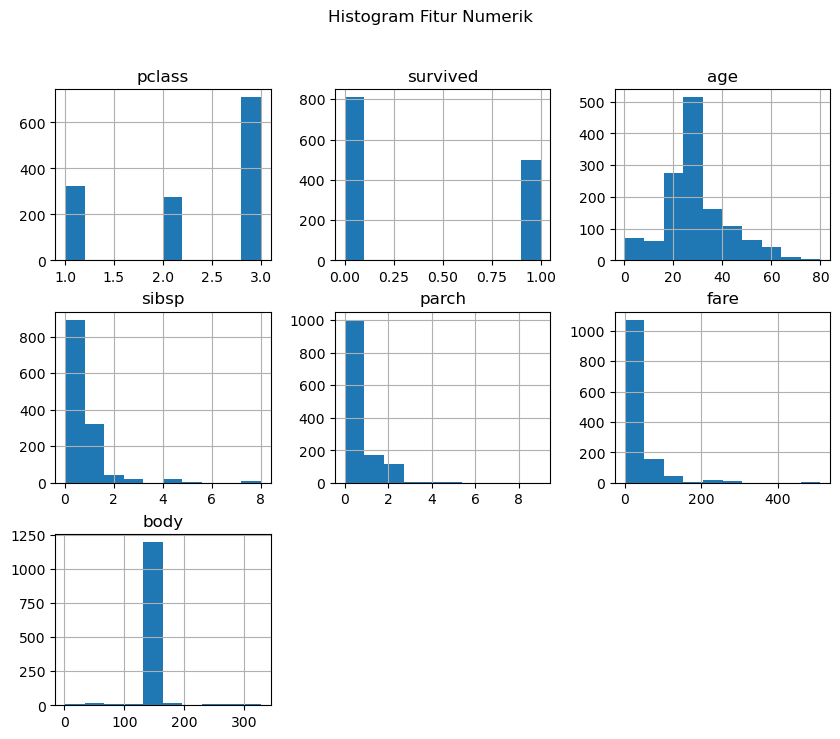

In [ ]:
df[numeric_cols].hist(figsize=(10, 8))
plt.suptitle('Histogram Fitur Numerik')
plt.show()

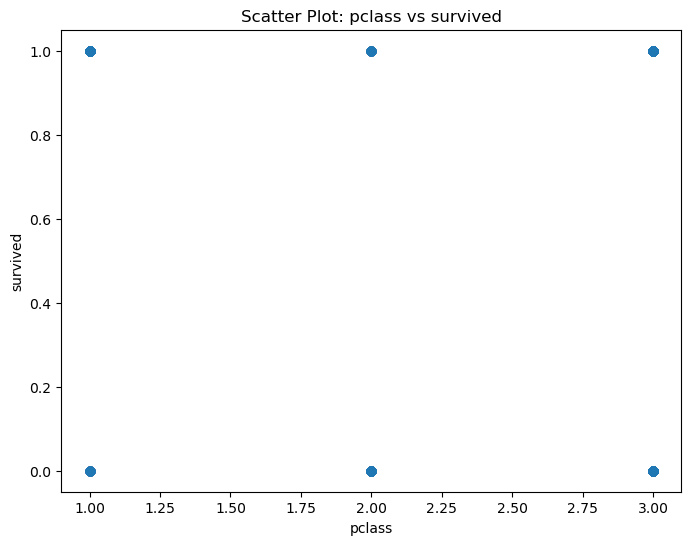

In [ ]:
if len(numeric_cols) >= 2:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[numeric_cols[0]], df[numeric_cols[1]], alpha=0.5)
    plt.xlabel(numeric_cols[0])
    plt.ylabel(numeric_cols[1])
    plt.title(f'Scatter Plot: {numeric_cols[0]} vs {numeric_cols[1]}')
    plt.show()
else:
    print("Tidak cukup kolom numerik untuk scatter plot.")

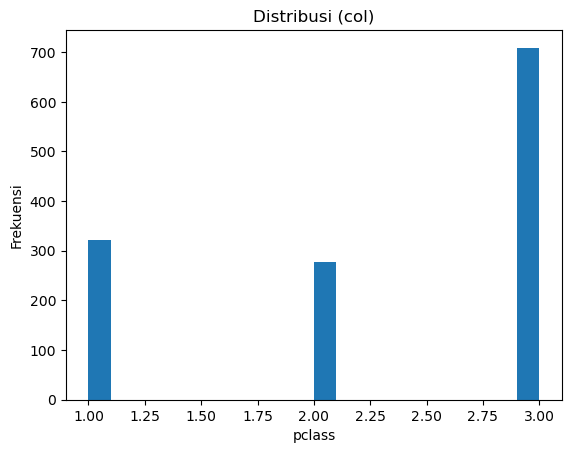

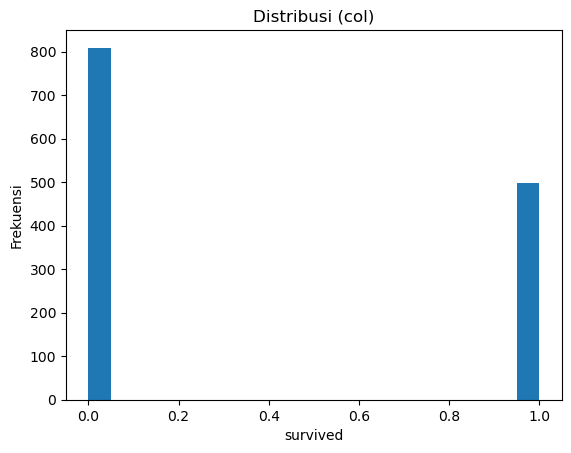

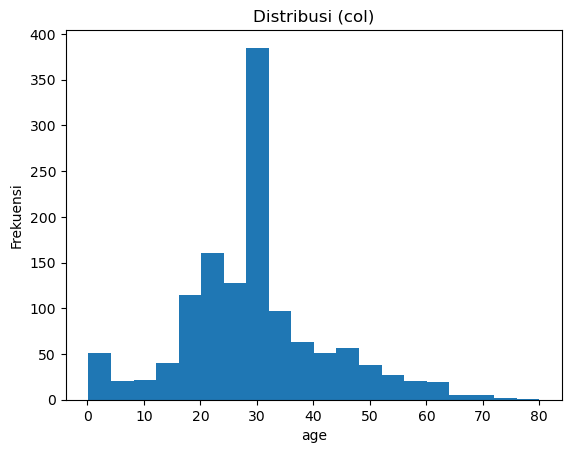

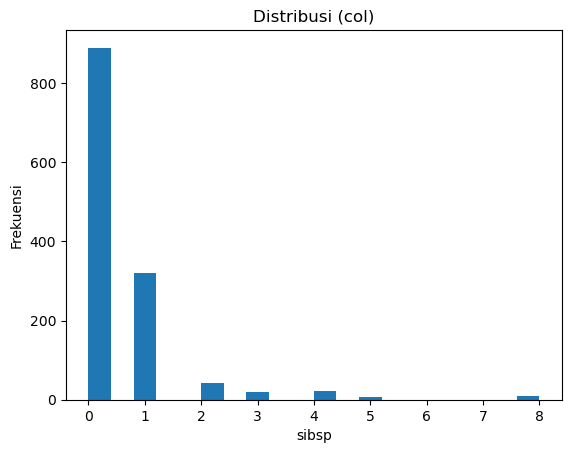

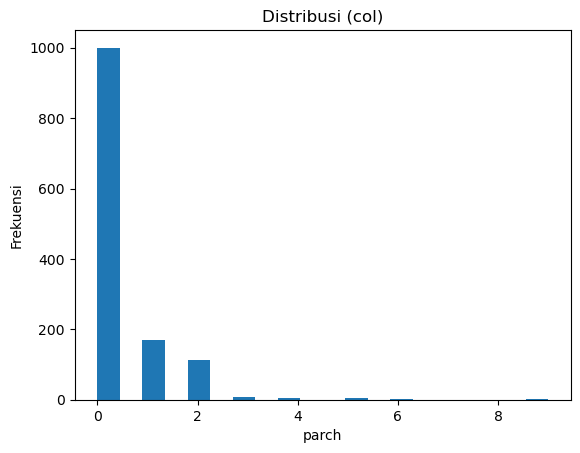

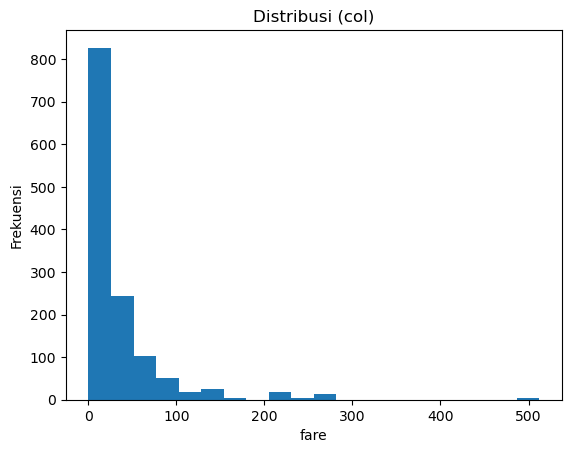

In [72]:
import matplotlib.pyplot as plt
num_cols = df.select_dtypes(include=['int64','float64']).columns
for col in num_cols:
    plt.figure()
    plt.hist(df[col], bins=20)
    plt.title("Distribusi (col)")
    plt.xlabel(col)
    plt.ylabel("Frekuensi")
    plt.show()

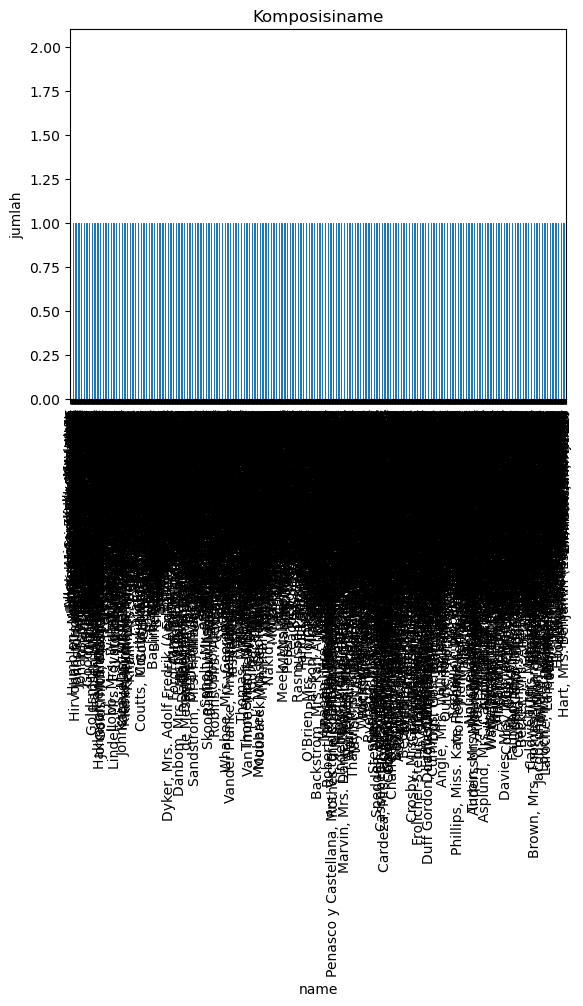

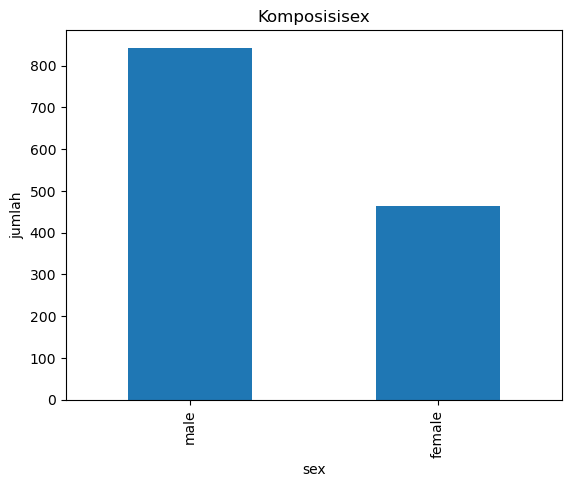

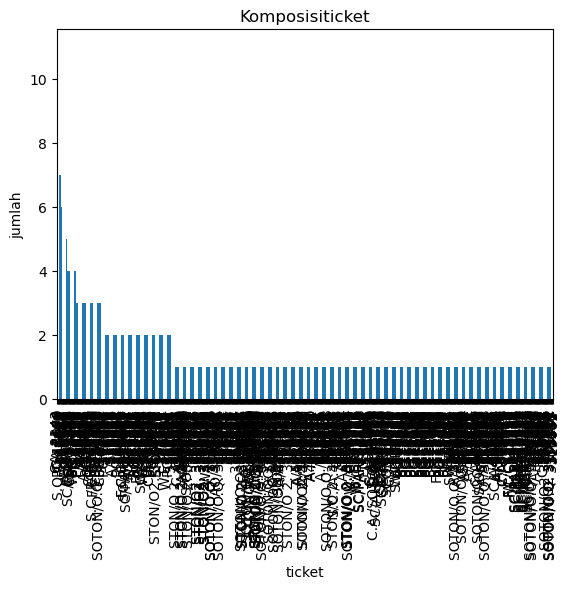

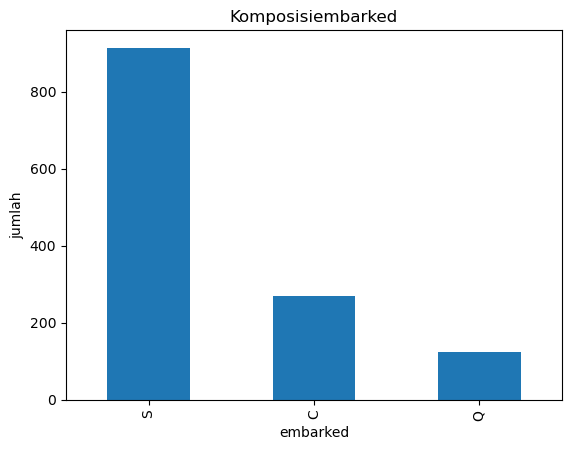

In [78]:
cat_cols = df.select_dtypes(include={'object','category'}).columns

for col in cat_cols:
    plt.figure()
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Komposisi{col}")
    plt.xlabel(col)
    plt.ylabel("jumlah")
    plt.show()

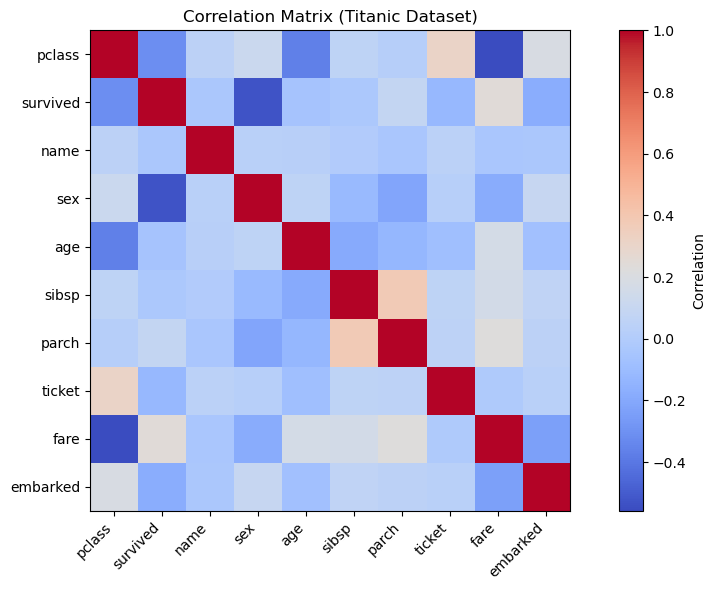

In [83]:
# hitung korelasi antar fitur
corr = df.corr(numeric_only=True)

# tampilkan matriks korelasi sebagai heatmap
plt.figure(figsize=(10, 6))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix (Titanic Dataset)")
plt.tight_layout()
plt.show()

In [84]:
df.corr(numeric_only=True)['survived'].sort_values(ascending=False)

survived    1.000000
fare        0.242902
parch       0.083642
sibsp      -0.026931
name       -0.033411
age        -0.053441
ticket     -0.123290
embarked   -0.176796
pclass     -0.310412
sex        -0.527458
Name: survived, dtype: float64

In [ ]:
for col in categorical_cols:
    le = LabelEncoder()
    df[col + '_encoded'] = le.fit_transform(df[col])
print("\nDataset setelah encoding kolom kategorikal:")
print(df.head())


Dataset setelah encoding kolom kategorikal:
   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

     age  sibsp  parch  ticket      fare    cabin  ... boat        body  \
0  29.00      0      0   24160  211.3375       B5  ...    2  160.809917   
1   0.92      1      2  113781  151.5500  C22 C26  ...   11  160.809917   
2   2.00      1      2  113781  151.5500  C22 C26  ...   13  160.809917   
3  30.00      1      2  113781  151.5500  C22 C26  ...   13  135.000000   
4  25.00      1      2  113781  151.5500  C22 C26  ...   13  160.809917   

                       

In [ ]:
print("\nDataset final siap digunakan:")
print(df.head())


Dataset final siap digunakan:
   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

     age  sibsp  parch  ticket      fare    cabin  ... boat        body  \
0  29.00      0      0   24160  211.3375       B5  ...    2  160.809917   
1   0.92      1      2  113781  151.5500  C22 C26  ...   11  160.809917   
2   2.00      1      2  113781  151.5500  C22 C26  ...   13  160.809917   
3  30.00      1      2  113781  151.5500  C22 C26  ...   13  135.000000   
4  25.00      1      2  113781  151.5500  C22 C26  ...   13  160.809917   

                         home.dest na

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1307 non-null   int64  
 1   survived  1307 non-null   int64  
 2   name      1307 non-null   int64  
 3   sex       1307 non-null   int64  
 4   age       1307 non-null   float64
 5   sibsp     1307 non-null   int64  
 6   parch     1307 non-null   int64  
 7   ticket    1307 non-null   int64  
 8   fare      1307 non-null   float64
 9   embarked  1307 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 112.3 KB


In [58]:
df['age'].fillna(df['age'].median(), inplace=True)

/var/folders/82/10vl_9w14bz9vtwywx530w0r0000gn/T/ipykernel_32152/1654433547.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


In [59]:
df = df.dropna(subset=['fare','embarked'])

In [64]:
df = df.drop(columns=['cabin','boat','body','home.dest'])

In [65]:
print(df.isnull().sum())

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64


In [81]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['pclass','survived', 'name', 'sex', 'ticket', 'embarked']:
    df[col] = le.fit_transform(df[col])

In [82]:
print(df.head())
print(df.info())

   pclass  survived  name  sex    age  sibsp  parch  ticket      fare  \
0       0         1    21    0  29.00      0      0     186  211.3375   
1       0         1    23    1   0.92      1      2      48  151.5500   
2       0         0    24    0   2.00      1      2      48  151.5500   
3       0         0    25    1  30.00      1      2      48  151.5500   
4       0         0    26    0  25.00      1      2      48  151.5500   

   embarked  
0         2  
1         2  
2         2  
3         2  
4         2  
<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1307 non-null   int64  
 1   survived  1307 non-null   int64  
 2   name      1307 non-null   int64  
 3   sex       1307 non-null   int64  
 4   age       1307 non-null   float64
 5   sibsp     1307 non-null   int64  
 6   parch     1307 non-null   int64  
 7   ticket    1307 non-

In [71]:
df_numeric = df.select_dtypes(include=['number'])
df_numeric.to_csv('Titanic_cleaned_numeric.csv', index=False)
print("\nDataset yang sudah bersih dan numerik disimpan sebagai 'Titanic_cleaned_numeric.csv'")



Dataset yang sudah bersih dan numerik disimpan sebagai 'Titanic_cleaned_numeric.csv'
